In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from math import radians, sin, cos, acos
from geopy.distance import distance
import pickle
from os.path import exists

%matplotlib inline

# Accessing and getting basic information about Data

In [2]:
df = pd.read_csv("airbnb.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
df.set_index("id", inplace = True)

In [7]:
df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.fillna({"name": "NA", "host_name": "NA", "last_review": "NA", "reviews_per_month": 0}, inplace = True)
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# Visualizing data to gather data about the various features

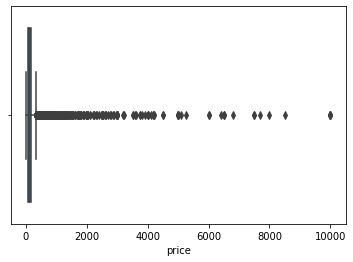

In [10]:
sns.boxplot(df["price"]);

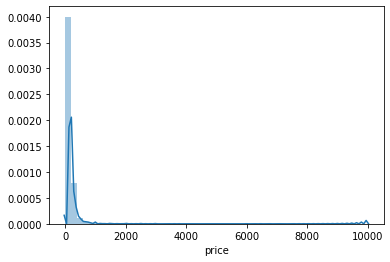

In [11]:
sns.distplot(df["price"]);

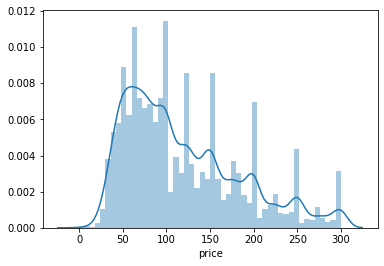

In [12]:
# Setting threshold to 300
df = df[df["price"] <= 300]
sns.distplot(df["price"]);

In [13]:
df["price"].describe()

count    45538.000000
mean       118.284070
std         65.908362
min          0.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        300.000000
Name: price, dtype: float64

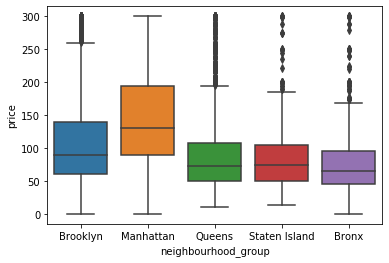

In [14]:
sns.boxplot(x = df["neighbourhood_group"], y = df["price"]);

In [15]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
min_distances = []
airports = {"JFK": (40.6413, -73.7781), "LaGuardia": (40.7769, -73.8740), "Newark": (40.6895, -74.1745)}

def geo_distance(origin, dest):
    return distance(origin, dest).km

def distance_to_nearest_airport(row):
    elat = row.latitude
    elon = row.longitude
    min_dist = 100000000000
    for v in airports.values():
        curr_dist = geo_distance(v, (elat, elon))
        if curr_dist < min_dist:
            min_dist = curr_dist
    min_distances.append(round(min_dist, 3))

In [17]:
len(df)

45538

In [18]:
for i in range(len(df)):
    distance_to_nearest_airport(df.iloc[i])

In [19]:
min_distances[:10]

[16.447, 9.622, 6.75, 12.503, 6.376, 9.125, 12.16, 9.46, 8.34, 12.094]

In [20]:
df["min_distance_to_airport"] = min_distances

In [21]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_distance_to_airport
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,16.447
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,9.622
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,0.00,1,365,6.750
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,12.503
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,6.376


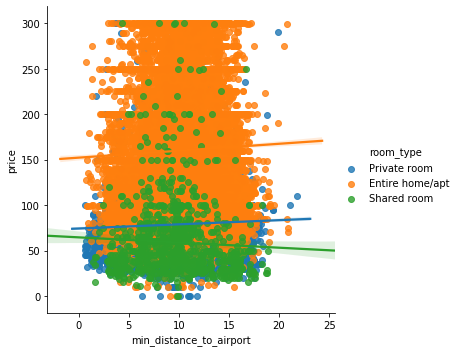

In [22]:
sns.lmplot(x = "min_distance_to_airport", y = "price", hue = "room_type", data = df);

In [23]:
df["price"].describe()

count    45538.000000
mean       118.284070
std         65.908362
min          0.000000
25%         65.000000
50%        100.000000
75%        155.000000
max        300.000000
Name: price, dtype: float64

In [24]:
df["name_length"] = df["name"].str.split(" ").map(len)

In [25]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,min_distance_to_airport,name_length
id,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,16.447,8
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,9.622,3
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,0.00,1,365,6.750,6
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,12.503,5
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,6.376,7


In [26]:
df.corr()["price"]

host_id                          -0.045841
latitude                          0.067392
longitude                        -0.305790
price                             1.000000
minimum_nights                    0.028054
number_of_reviews                -0.027883
reviews_per_month                -0.050319
calculated_host_listings_count    0.155281
availability_365                  0.057904
min_distance_to_airport           0.080245
name_length                       0.067450
Name: price, dtype: float64

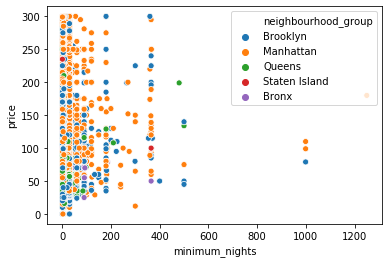

In [27]:
sns.scatterplot(x = "minimum_nights", y = "price", hue = "neighbourhood_group",data = df);

In [28]:
df["minimum_nights"].describe()

count    45538.000000
mean         6.906408
std         19.894956
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

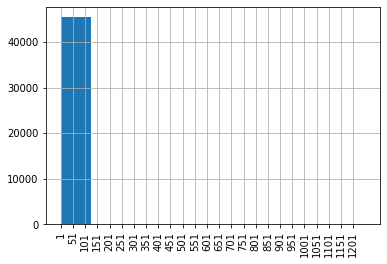

In [29]:
df["minimum_nights"].hist()
plt.xticks(np.arange(1, 1250, 50), rotation = "vertical")
plt.show();

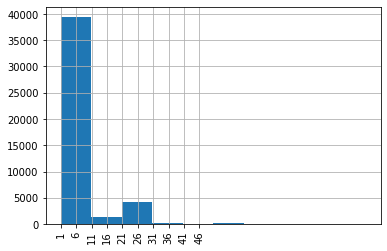

In [30]:
df[df["minimum_nights"] <= 101]["minimum_nights"].hist()
plt.xticks(np.arange(1, 51, 5), rotation = "vertical")
plt.show();

In [31]:
df.loc[(df["minimum_nights"] <= 30), "minimum_nights"] = 30

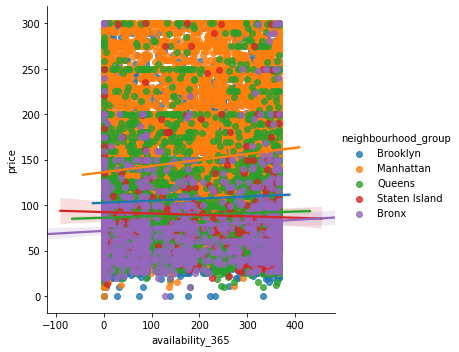

In [32]:
sns.lmplot(x = "availability_365", y = "price", hue = "neighbourhood_group", data = df);

In [33]:
df.corr()["price"].map(abs).sort_values()

minimum_nights                    0.003413
number_of_reviews                 0.027883
host_id                           0.045841
reviews_per_month                 0.050319
availability_365                  0.057904
latitude                          0.067392
name_length                       0.067450
min_distance_to_airport           0.080245
calculated_host_listings_count    0.155281
longitude                         0.305790
price                             1.000000
Name: price, dtype: float64

In [34]:
drop_columns = ["name", "host_id", "host_name", "last_review", "latitude"]
df.drop(drop_columns, axis = 1, inplace = True)

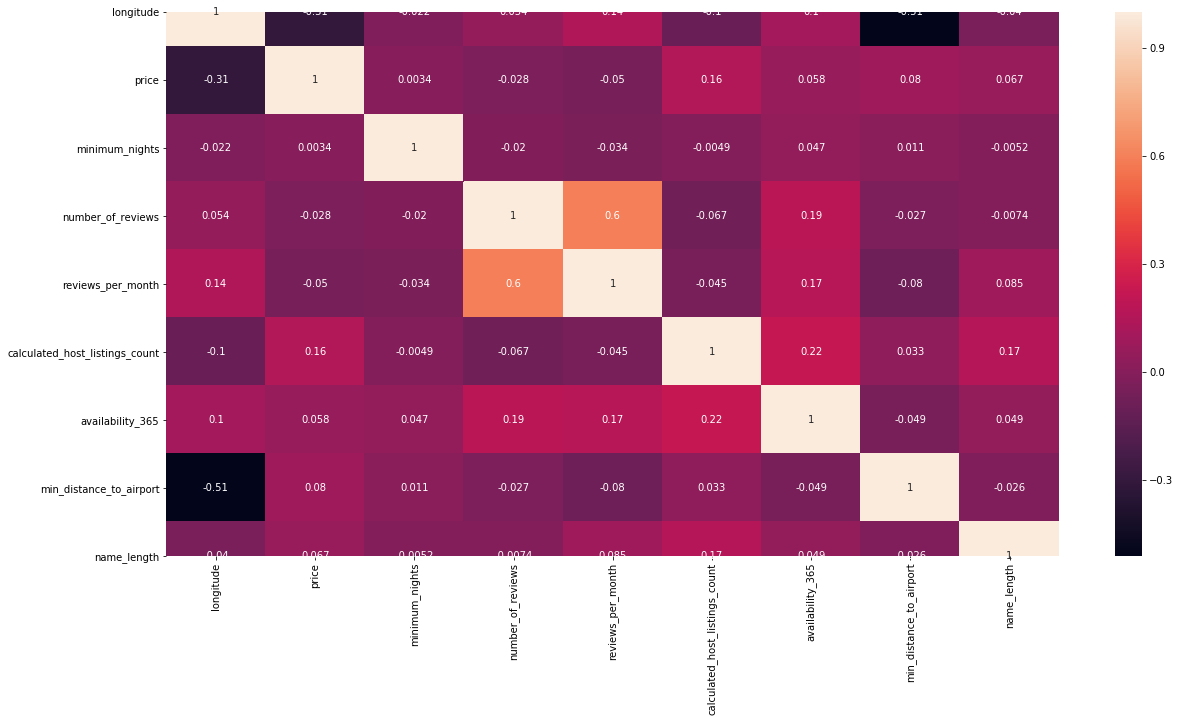

In [35]:
corr = df.corr(method = "pearson")
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True);

# Regression

In [36]:
df.head()

,neighbourhood_group,neighbourhood,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_distance_to_airport,name_length
id,,,,,,,,,,,,
2539,Brooklyn,Kensington,-73.97237,Private room,149,30,9,0.21,6,365,16.447,8
2595,Manhattan,Midtown,-73.98377,Entire home/apt,225,30,45,0.38,2,355,9.622,3
3647,Manhattan,Harlem,-73.94190,Private room,150,30,0,0.00,1,365,6.750,6
3831,Brooklyn,Clinton Hill,-73.95976,Entire home/apt,89,30,270,4.64,1,194,12.503,5
5022,Manhattan,East Harlem,-73.94399,Entire home/apt,80,30,9,0.10,1,0,6.376,7


In [37]:
df_hot = pd.get_dummies(df, columns = ['neighbourhood_group',"room_type", "neighbourhood"], prefix = ['ng',"rt", "nh"],drop_first= True)
# df_hot.drop(["neighbourhood"], axis = 1, inplace = True)
df_hot.head()

,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_distance_to_airport,name_length,ng_Brooklyn,...,nh_Westchester Square,nh_Westerleigh,nh_Whitestone,nh_Williamsbridge,nh_Williamsburg,nh_Willowbrook,nh_Windsor Terrace,nh_Woodhaven,nh_Woodlawn,nh_Woodside
id,,,,,,,,,,,,,,,,,,,,,
2539,-73.97237,149,30,9,0.21,6,365,16.447,8,1,...,0,0,0,0,0,0,0,0,0,0
2595,-73.98377,225,30,45,0.38,2,355,9.622,3,0,...,0,0,0,0,0,0,0,0,0,0
3647,-73.94190,150,30,0,0.00,1,365,6.750,6,0,...,0,0,0,0,0,0,0,0,0,0
3831,-73.95976,89,30,270,4.64,1,194,12.503,5,1,...,0,0,0,0,0,0,0,0,0,0
5022,-73.94399,80,30,9,0.10,1,0,6.376,7,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_hot.shape

(45538, 233)

In [39]:
from sklearn.model_selection import train_test_split
X = df_hot.loc[:, df_hot.columns != "price"]
Y = df_hot["price"]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

In [41]:
model_lr = LinearRegression().fit(X_train, Y_train)

In [42]:
model_lr.coef_

array([-4.60576248e+02, -7.96512403e-02, -4.26001465e-02, -1.28314406e-03,
        1.14759108e-02,  5.50714282e-02, -7.94225290e-01,  9.11449753e-01,
        5.26220516e+08, -3.50054903e+10, -3.55667058e+09, -1.12980056e+10,
       -6.98258143e+01, -9.32831738e+01,  1.12980054e+10,  1.12980055e+10,
        3.55667066e+09,  3.55667058e+09, -5.26220569e+08,  3.50054903e+10,
       -5.26220570e+08,  3.55667068e+09, -5.05428730e+10,  1.31870567e+01,
        3.55667065e+09,  3.55667064e+09, -5.26220526e+08,  3.55667065e+09,
        3.55667069e+09,  1.56900810e+01, -5.26220562e+08, -5.26220540e+08,
       -5.26220510e+08, -5.26220565e+08,  3.55667077e+09,  3.55667063e+09,
       -5.26220539e+08, -1.41483201e+01, -5.26220514e+08, -5.26220522e+08,
        1.12980054e+10, -5.26220522e+08,  3.55667066e+09, -5.26220523e+08,
       -5.26220521e+08, -9.27138734e+00,  1.12980055e+10,  3.50054903e+10,
        3.50054903e+10,  3.74795203e+01,  3.50054903e+10, -4.94620949e+00,
        2.33415588e+01,  

In [43]:
model_lr.score(X_train, Y_train)

0.5289952623993418

In [44]:
from sklearn import preprocessing, metrics

Y_pred = model_lr.predict(X_test)

In [45]:
Y_pred

array([107.47334897,  84.3691672 ,  57.65982514, ...,  51.91864287,
       120.88072661, 195.3041824 ])

In [46]:
np.array(Y_test)

array([160,  75,  40, ...,  60,  99,  95], dtype=int64)

In [47]:
pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred})

,Actual,Predicted
id,,
33644836,160,107.473349
36382381,75,84.369167
28438882,40,57.659825
8077469,46,84.969436
4725852,100,161.351765
25011733,170,165.864554
4629870,130,180.918526
13031383,75,86.478019
6643716,100,118.128775


In [48]:
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

924009026.544081

In [49]:
df_hot.head()

,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,min_distance_to_airport,name_length,ng_Brooklyn,...,nh_Westchester Square,nh_Westerleigh,nh_Whitestone,nh_Williamsbridge,nh_Williamsburg,nh_Willowbrook,nh_Windsor Terrace,nh_Woodhaven,nh_Woodlawn,nh_Woodside
id,,,,,,,,,,,,,,,,,,,,,
2539,-73.97237,149,30,9,0.21,6,365,16.447,8,1,...,0,0,0,0,0,0,0,0,0,0
2595,-73.98377,225,30,45,0.38,2,355,9.622,3,0,...,0,0,0,0,0,0,0,0,0,0
3647,-73.94190,150,30,0,0.00,1,365,6.750,6,0,...,0,0,0,0,0,0,0,0,0,0
3831,-73.95976,89,30,270,4.64,1,194,12.503,5,1,...,0,0,0,0,0,0,0,0,0,0
5022,-73.94399,80,30,9,0.10,1,0,6.376,7,0,...,0,0,0,0,0,0,0,0,0,0


## Lasso

In [50]:
model_lasso = Lasso(alpha = 0.000000001)

In [51]:
model_lasso.fit(X_train, Y_train)

c:\users\suman\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37084969.596099496, tolerance: 15747.195714531974
  positive)


Lasso(alpha=1e-09)

In [52]:
Y_pred_lasso = model_lasso.predict(X_test)

In [53]:
model_lasso.score(X_train, Y_train)

0.5289952319450921

In [54]:
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso))

45.66401240822612

## Ridge

In [55]:
model_ridge = Ridge(alpha = 0.001)

In [56]:
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.001)

In [57]:
Y_pred_ridge = model_ridge.predict(X_test)

In [58]:
model_ridge.score(X_train, Y_train)

0.5289952602114234

In [59]:
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge))

45.66403703321316

## Random Forest Model

In [60]:
model_random = RandomForestRegressor(n_estimators=300)

In [61]:
model_random.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=300)

In [62]:
Y_pred_random = model_random.predict(X_test)

In [63]:
model_random.score(X_train, Y_train)

0.93864448733176

In [64]:
model_random.score(X_test, Y_test)

0.5581881158193622

In [65]:
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_random))

44.21788368078946

# Optimization for the best model

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
n_estimators = [int(i) for i in np.linspace(200, 1000, 5)]
max_features = ["auto", "sqrt", "log2"]
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
max_depth = [int(i) for i in np.linspace(10, 100, 5)]
params_dists = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap
}

In [69]:
random_model = RandomForestRegressor()
optimized_model = RandomizedSearchCV(estimator = random_model, param_distributions = params_dists, n_iter = 100, cv = 3, verbose = 2, random_state = 13, n_jobs = -1)

In [70]:
optimized_model

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=13, verbose=2)

In [71]:
if exists("final_model.sav"):
    optimized_model = pickle.load(open("final_model.sav", 'rb'))
else:
    optimized_model.fit(X_train, Y_train) # Estimated time: 130 min

In [72]:
optimized_model.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [73]:
optimized_model.score(X_train, Y_train)

0.6167170272144717

In [73]:
y_pred_opt = optimized_model.predict(X_test)

In [74]:
np.sqrt(metrics.mean_squared_error(Y_test,y_pred_opt))

44.03230825538944

In [75]:
optimized_model.score(X_test, Y_test)

0.5618887624015754

In [76]:
optimized_model.predict(X)

array([ 93.05041132, 184.82372909, 116.45035463, ..., 136.79472766,
        83.3087703 , 120.1285096 ])

In [79]:
pd.DataFrame({"Actual": Y, "Predicted": optimized_model.predict(X)})

,Actual,Predicted
id,,
2539,149,93.050411
2595,225,184.823729
3647,150,116.450355
3831,89,144.916453
5022,80,137.756980
5099,200,187.686689
5121,60,69.229791
5178,79,118.480771
5203,79,83.546268


In [83]:
pickle.dump(optimized_model, open("final_model.sav", "wb"))